In [1]:
quality = read.csv("data/quality.csv")

In [2]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [3]:
table(quality$PoorCare)


 0  1 
98 33 

## Base line model acc:

In [5]:
98/131

[1] 0.7480916

## Train / Test split with catools

In [6]:
# install.packages('caTools')

library(caTools)

In [7]:
set.seed(88)

In [8]:
split = sample.split(quality$PoorCare, SplitRatio = 0.75)

In [11]:
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [12]:
qualityTrain = subset(quality, split == TRUE)
qualityTest = subset(quality, split == FALSE)

In [13]:
nrow(qualityTrain)
nrow(qualityTest)

[1] 99

[1] 32

In [14]:
?glm

glm {stats},R Documentation
formula,"an object of class ""formula"" (or one that can be coerced to that class): a symbolic description of the model to be fitted. The details of model specification are given under ‘Details’."
family,"a description of the error distribution and link function to be used in the model. For glm this can be a character string naming a family function, a family function or the result of a call to a family function. For glm.fit only the third option is supported. (See family for details of family functions.)"
data,"an optional data frame, list or environment (or object coercible by as.data.frame to a data frame) containing the variables in the model. If not found in data, the variables are taken from environment(formula), typically the environment from which glm is called."
weights,an optional vector of ‘prior weights’ to be used in the fitting process. Should be NULL or a numeric vector.
subset,an optional vector specifying a subset of observations to be used in the fitting process.
na.action,"a function which indicates what should happen when the data contain NAs. The default is set by the na.action setting of options, and is na.fail if that is unset. The ‘factory-fresh’ default is na.omit. Another possible value is NULL, no action. Value na.exclude can be useful."
start,starting values for the parameters in the linear predictor.
etastart,starting values for the linear predictor.
mustart,starting values for the vector of means.
offset,"this can be used to specify an a priori known component to be included in the linear predictor during fitting. This should be NULL or a numeric vector of length equal to the number of cases. One or more offset terms can be included in the formula instead or as well, and if more than one is specified their sum is used. See model.offset."


In [15]:
?family

family {stats},R Documentation
link,"a specification for the model link function. This can be a name/expression, a literal character string, a length-one character vector or an object of class ""link-glm"" (such as generated by make.link) provided it is not specified via one of the standard names given next. The gaussian family accepts the links (as names) identity, log and inverse; the binomial family the links logit, probit, cauchit, (corresponding to logistic, normal and Cauchy CDFs respectively) log and cloglog (complementary log-log); the Gamma family the links inverse, identity and log; the poisson family the links log, identity, and sqrt and the inverse.gaussian family the links 1/mu^2, inverse, identity and log. The quasi family accepts the links logit, probit, cloglog, identity, inverse, log, 1/mu^2 and sqrt, and the function power can be used to create a power link function."
variance,"for all families other than quasi, the variance function is determined by the family. The quasi family will accept the literal character string (or unquoted as a name/expression) specifications ""constant"", ""mu(1-mu)"", ""mu"", ""mu^2"" and ""mu^3"", a length-one character vector taking one of those values, or a list containing components varfun, validmu, dev.resids, initialize and name."
object,"the function family accesses the family objects which are stored within objects created by modelling functions (e.g., glm)."
...,further arguments passed to methods.
family,character: the family name.
link,character: the link name.
linkfun,function: the link.
linkinv,function: the inverse of the link function.
variance,function: the variance as a function of the mean.
dev.resids,"function giving the deviance residuals as a function of (y, mu, wt)."


In [19]:
QualityLogR = glm(PoorCare ~OfficeVisits + Narcotics,
                  data = qualityTrain,
                 family = binomial)

In [20]:
summary(QualityLogR)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


### AIC

AIC is a measure of the quality of the model and is like Adjested R-squared in that it accounts for the number of variables used compared to the number of obervations.

Unfortunately, it can only be compared between models on the same data set. But it provides a means for model selection.

** The preferred model is the one with the minimum AIC **

## Making predictions:

In [21]:
predictTrain = predict(QualityLogR, 
                       type = 'response', # this tells the predict
                       # function to give probabilities
                       newdata = qualityTrain)

In [22]:
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11910 0.15970 0.25250 0.26760 0.98460 

In [23]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

## Threshold Value t and Confusion Matrix:

|Predicted = 0| Predicted = 1
-|-|-
**Actual = 0**| True Negative (TN)| False Positive (FP)
**Actual = 1**| False Negetive (FN)| True Positive (TP)

### sensitivity (true positive rate / Recall)= TP / (TP + FN)
### specificity (true negative rate)= TN / (TN + FP)
### precision or positive predictive value (PPV) = TP / (TP + FP)

A model with a higher threshold will have a lower sensitivity and higher specificity, and vise versa.

In [24]:
table(qualityTrain$PoorCare, predictTrain > 0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

In [25]:
# sensitivity
10 / (10+15)

[1] 0.4

In [26]:
# specificity
70 / (70+4)

[1] 0.9459459

In [27]:
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [29]:
# sensitivity
8/(17+8)

[1] 0.32

In [30]:
# specificity
73 / (73 +1)

[1] 0.9864865

In [31]:
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [32]:
# sensitivity
16 / (16+9)

[1] 0.64

In [33]:
# specificity
54 / (54 + 20)

[1] 0.7297297

## Generate ROC curve

In [34]:
#install.packages("ROCR")
library(ROCR)

Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [38]:
ROCRpred = prediction(predictTrain, # probability prediction
                      qualityTrain$PoorCare # True labels
                     )
ROCRperf = performance(ROCRpred, "tpr", "fpr")

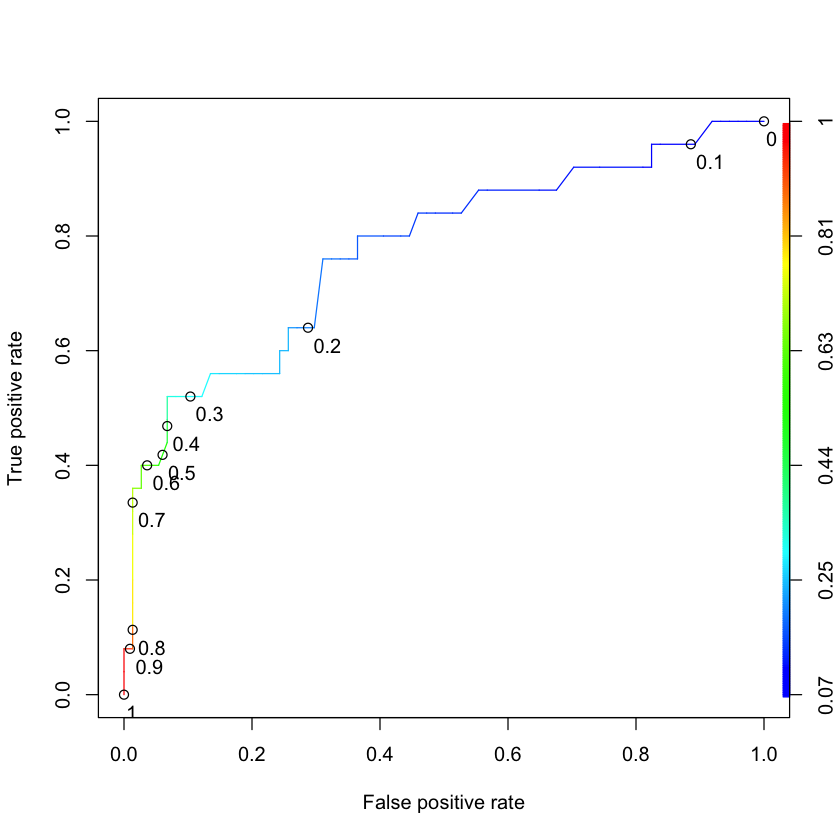

In [44]:
plot(ROCRperf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,1.7))

## Multicollinearity
Multicollinearity could be a problem
* Do the coefficient make sense?
* Check correlations

## AUC - Area Under the ROC Curve

In [46]:
predictTest = predict(QualityLogR, type="response", newdata=qualityTest)

In [47]:
ROCRpredTest = prediction(predictTest, qualityTest$PoorCare)

In [48]:
auc = as.numeric(performance(ROCRpredTest, "auc")@y.values)

In [49]:
auc

[1] 0.7994792